In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O ./cats_and_dogs_filtered.zip

--2023-02-25 04:50:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.48, 34.64.4.16, 34.64.4.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  10.2MB/s    in 6.5s    

2023-02-25 04:50:45 (10.1 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./cat_dog/')
zip_ref.close()

In [6]:
!mv ./cat_dog/cats_and_dogs_filtered ./

In [7]:
!ls

cat_dog  cats_and_dogs_filtered  cats_and_dogs_filtered.zip  Untitled.ipynb


In [8]:
!ls cats_and_dogs_filtered/

train  validation  vectorize.py


In [9]:
import os 
import random , glob , shutil

base_path = os.getcwd()+'/cats_and_dogs_filtered'

os.chdir(base_path)
if not os.path.isdir('./test') :
  os.makedirs('./test/dogs')
  os.makedirs('./test/cats')

os.chdir(base_path+'/train/dogs')
for i in random.sample(glob.glob('*'), 50):
        shutil.move(i, base_path+'/test/dogs/')   
os.chdir(base_path+'/train/cats')
for i in random.sample(glob.glob('*'), 50):
        shutil.move(i, base_path+'/test/cats/')

In [10]:
print('total training cat images:', len(os.listdir(base_path+'/train/cats')))
print('total training dog images:', len(os.listdir(base_path+'/train/dogs')))
print('total validation cat images:', len(os.listdir(base_path+'/validation/cats')))
print('total validation dog images:', len(os.listdir(base_path+'/validation/dogs')))

total training cat images: 950
total training dog images: 950
total validation cat images: 500
total validation dog images: 500


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=base_path+'/train', target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=base_path+'/validation', target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=base_path+'/test', target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)


2023-02-25 04:54:30.604863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1900 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

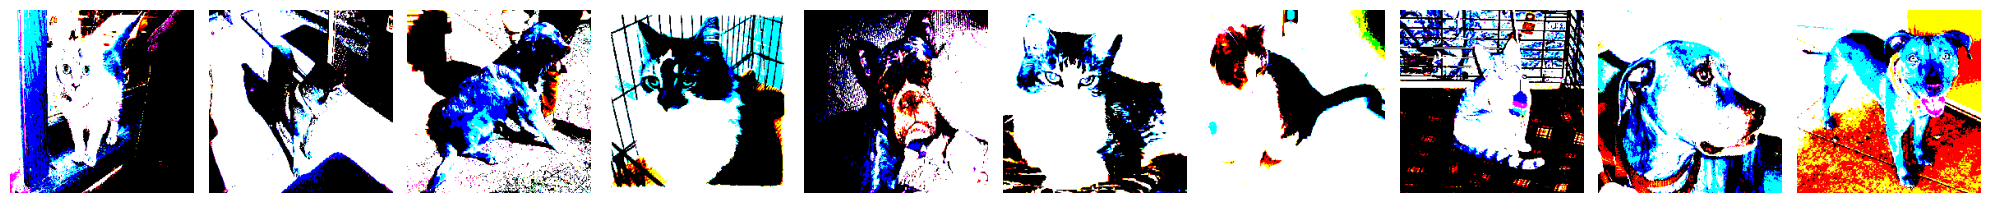

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [12]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()



imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), activation='relu', padding = 'same', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

2023-02-25 04:55:47.981559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 2)                 1

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
190/190 - 15s - loss: 7.0904 - accuracy: 0.5611 - val_loss: 4.9347 - val_accuracy: 0.5770 - 15s/epoch - 76ms/step
Epoch 2/10
190/190 - 14s - loss: 3.5703 - accuracy: 0.6111 - val_loss: 3.1657 - val_accuracy: 0.6120 - 14s/epoch - 73ms/step
Epoch 3/10
190/190 - 14s - loss: 2.1655 - accuracy: 0.6642 - val_loss: 2.3933 - val_accuracy: 0.6430 - 14s/epoch - 75ms/step
Epoch 4/10
190/190 - 14s - loss: 1.5531 - accuracy: 0.7142 - val_loss: 2.1589 - val_accuracy: 0.6450 - 14s/epoch - 73ms/step
Epoch 5/10
190/190 - 14s - loss: 1.1256 - accuracy: 0.7511 - val_loss: 2.1548 - val_accuracy: 0.6500 - 14s/epoch - 74ms/step
Epoch 6/10
190/190 - 14s - loss: 0.8661 - accuracy: 0.7747 - val_loss: 2.0330 - val_accuracy: 0.6400 - 14s/epoch - 76ms/step
Epoch 7/10
190/190 - 14s - loss: 0.6459 - accuracy: 0.8126 - val_loss: 1.8817 - val_accuracy: 0.6430 - 14s/epoch - 74ms/step
Epoch 8/10
190/190 - 14s - loss: 0.5316 - accuracy: 0.8432 - val_loss: 1.8483 - val_accuracy: 0.6510 - 14s/epoch - 73ms/step


In [17]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


2023-02-25 04:58:58.629132: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-25 04:58:58.693914: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-25 04:58:58.766160: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


553467096/553467096 [==============================] - 55s 0us/step


2023-02-25 04:59:56.441271: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


In [24]:
model = tf.keras.models.Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
    print(layer.trainable)
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [26]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
190/190 - 165s - loss: 0.2258 - accuracy: 0.9053 - val_loss: 0.0783 - val_accuracy: 0.9690 - 165s/epoch - 870ms/step
Epoch 2/5
190/190 - 168s - loss: 0.0664 - accuracy: 0.9753 - val_loss: 0.0622 - val_accuracy: 0.9750 - 168s/epoch - 884ms/step
Epoch 3/5
190/190 - 166s - loss: 0.0470 - accuracy: 0.9832 - val_loss: 0.0571 - val_accuracy: 0.9790 - 166s/epoch - 872ms/step
Epoch 4/5
190/190 - 163s - loss: 0.0353 - accuracy: 0.9879 - val_loss: 0.0560 - val_accuracy: 0.9760 - 163s/epoch - 858ms/step
Epoch 5/5
190/190 - 164s - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.0528 - val_accuracy: 0.9790 - 164s/epoch - 863ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

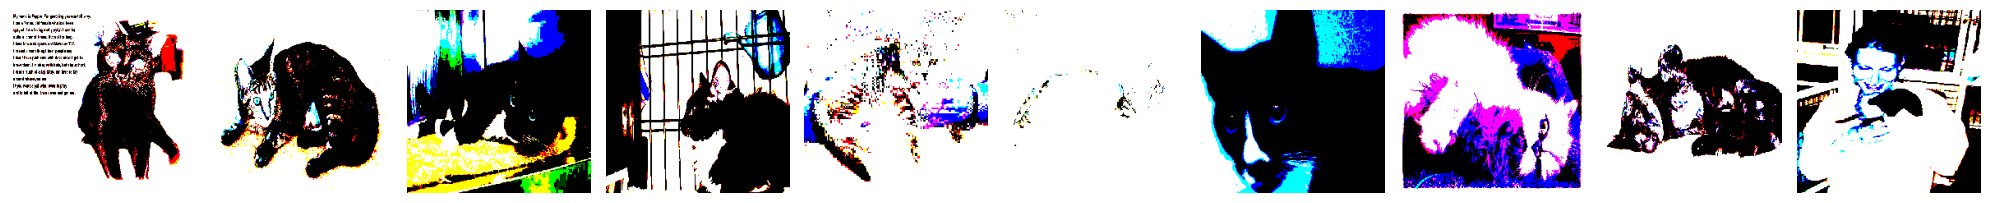

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [28]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [29]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [41]:
import numpy as np
print(test_batches.labels)
print((np.argmax(predictions,axis=-1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
